# CMPE 257: Machine Learning

## ***Team Spartans:***

**- Pramatha Nadig**

**- Jack Kalavadia**

**- Rutvik Moradiya**

**- Rishikesh Andhare**


# Bike Sharing Demand Prediction

## With Following Classifiers

* Random Forest
* Decision Tree
* RBF SVM
* Lineat SVM
* AdaBoost
* Neural Net



Bike sharing systems have gained immense popularity in urban settings, offering a convenient and eco-friendly transportation alternative. These modern bike rentals have automated the entire process—from membership and rental to return—allowing users to easily rent a bike from one location and return it to another.

Given the increasing role of bike-sharing systems in addressing traffic congestion, environmental concerns, and public health, predicting bike demand has become crucial for effective city planning. Each team member has performarmed multiple classifications to achieve the optimal amalgamation outcome.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Importing all dataasets
# Data Wrangling

In [141]:
datasetUrl1 = 'https://drive.google.com/file/d/10wKdg9HnqQ_o9UZatlAsTMfiIpg8NtMq'
datasetUrl1 ='https://drive.google.com/uc?id=' + datasetUrl1.split('/')[-1]
data1 = pd.read_csv(datasetUrl1)
data1.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [142]:
datasetUrl2 = 'https://drive.google.com/file/d/1yVL1fUAfZ5ktpPbaAAF8zQrLlBAicgN7'
datasetUrl2 ='https://drive.google.com/uc?id=' + datasetUrl2.split('/')[-1]
data2 = pd.read_csv(datasetUrl2, encoding_errors='ignore')
data2.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [143]:
data2['year'] = data2['Date'].str.split('/').str[2]

In [144]:
data1['year'] = data1['dteday'].str.split('-').str[0]

In [145]:
data1.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,2011
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,2011
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,2011
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,2011
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,2011


In [146]:
data2.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2017
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,2017
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,2017
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,2017


In [147]:
data2 = data2.drop(['Date', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday'], axis = 1)

In [148]:
data1 = data1.drop(['workingday','holiday','weathersit','yr'], axis = 1)

In [149]:
data1.head(10)

,instant,dteday,season,mnth,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,1,0,6,0.24,0.2879,0.81,0.0000,3,13,16,2011
1,2,2011-01-01,1,1,1,6,0.22,0.2727,0.80,0.0000,8,32,40,2011
2,3,2011-01-01,1,1,2,6,0.22,0.2727,0.80,0.0000,5,27,32,2011
3,4,2011-01-01,1,1,3,6,0.24,0.2879,0.75,0.0000,3,10,13,2011
4,5,2011-01-01,1,1,4,6,0.24,0.2879,0.75,0.0000,0,1,1,2011
5,6,2011-01-01,1,1,5,6,0.24,0.2576,0.75,0.0896,0,1,1,2011
6,7,2011-01-01,1,1,6,6,0.22,0.2727,0.80,0.0000,2,0,2,2011
7,8,2011-01-01,1,1,7,6,0.20,0.2576,0.86,0.0000,1,2,3,2011
8,9,2011-01-01,1,1,8,6,0.24,0.2879,0.75,0.0000,1,7,8,2011
9,10,2011-01-01,1,1,9,6,0.32,0.3485,0.76,0.0000,8,6,14,2011


In [150]:
data2.head(10)

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Functioning Day,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,Yes,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,Yes,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,Yes,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,Yes,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,Yes,2017
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,Yes,2017
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,Yes,2017
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,Yes,2017
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,Yes,2017
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,Yes,2017


In [151]:
data1.rename(columns = {'hr':'Hour','windspeed':'Wind speed (m/s)','zip_code':'zipcode', 'num_bedrooms':'bedrooms','yr':'year'}, inplace = True)

In [152]:
data1.head(10)

,instant,dteday,season,mnth,Hour,weekday,temp,atemp,hum,Wind speed (m/s),casual,registered,cnt,year
0,1,2011-01-01,1,1,0,6,0.24,0.2879,0.81,0.0000,3,13,16,2011
1,2,2011-01-01,1,1,1,6,0.22,0.2727,0.80,0.0000,8,32,40,2011
2,3,2011-01-01,1,1,2,6,0.22,0.2727,0.80,0.0000,5,27,32,2011
3,4,2011-01-01,1,1,3,6,0.24,0.2879,0.75,0.0000,3,10,13,2011
4,5,2011-01-01,1,1,4,6,0.24,0.2879,0.75,0.0000,0,1,1,2011
5,6,2011-01-01,1,1,5,6,0.24,0.2576,0.75,0.0896,0,1,1,2011
6,7,2011-01-01,1,1,6,6,0.22,0.2727,0.80,0.0000,2,0,2,2011
7,8,2011-01-01,1,1,7,6,0.20,0.2576,0.86,0.0000,1,2,3,2011
8,9,2011-01-01,1,1,8,6,0.24,0.2879,0.75,0.0000,1,7,8,2011
9,10,2011-01-01,1,1,9,6,0.32,0.3485,0.76,0.0000,8,6,14,2011


In [153]:
df = data1.merge(data2, on = ['Hour','Wind speed (m/s)'], how = 'outer')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31759 entries, 0 to 31758
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   23073 non-null  float64
 1   dteday                    23073 non-null  object 
 2   season                    23073 non-null  float64
 3   mnth                      23073 non-null  float64
 4   Hour                      31759 non-null  int64  
 5   weekday                   23073 non-null  float64
 6   temp                      23073 non-null  float64
 7   atemp                     23073 non-null  float64
 8   hum                       23073 non-null  float64
 9   Wind speed (m/s)          31759 non-null  float64
 10  casual                    23073 non-null  float64
 11  registered                23073 non-null  float64
 12  cnt                       23073 non-null  float64
 13  year_x                    23073 non-null  object 
 14  Rented

In [155]:
df.to_csv('updated_csv.csv')

In [156]:
df=df.drop(['atemp','Humidity(%)','year_y','Functioning Day','registered','casual','weekday','dteday'],axis=1)

In [157]:
df.head()

,instant,season,mnth,Hour,temp,hum,Wind speed (m/s),cnt,year_x,Rented Bike Count,Temperature(C),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2)
0,1.0,1.0,1.0,0,0.24,0.81,0.0,16.0,2011,145.0,-2.8,331.0,-6.2,0.0
1,1.0,1.0,1.0,0,0.24,0.81,0.0,16.0,2011,811.0,10.4,971.0,2.7,0.0
2,1.0,1.0,1.0,0,0.24,0.81,0.0,16.0,2011,848.0,11.2,1613.0,4.1,0.0
3,1.0,1.0,1.0,0,0.24,0.81,0.0,16.0,2011,520.0,10.1,922.0,5.8,0.0
4,93.0,1.0,1.0,0,0.20,0.64,0.0,6.0,2011,145.0,-2.8,331.0,-6.2,0.0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31759 entries, 0 to 31758
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   23073 non-null  float64
 1   season                    23073 non-null  float64
 2   mnth                      23073 non-null  float64
 3   Hour                      31759 non-null  int64  
 4   temp                      23073 non-null  float64
 5   hum                       23073 non-null  float64
 6   Wind speed (m/s)          31759 non-null  float64
 7   cnt                       23073 non-null  float64
 8   year_x                    23073 non-null  object 
 9   Rented Bike Count         16560 non-null  float64
 10  Temperature(C)            16560 non-null  float64
 11  Visibility (10m)          16560 non-null  float64
 12  Dew point temperature(C)  16560 non-null  float64
 13  Solar Radiation (MJ/m2)   16560 non-null  float64
dtypes: flo

# Exploratory Data Analysis (EDA)

<Axes: xlabel='Wind speed (m/s)'>

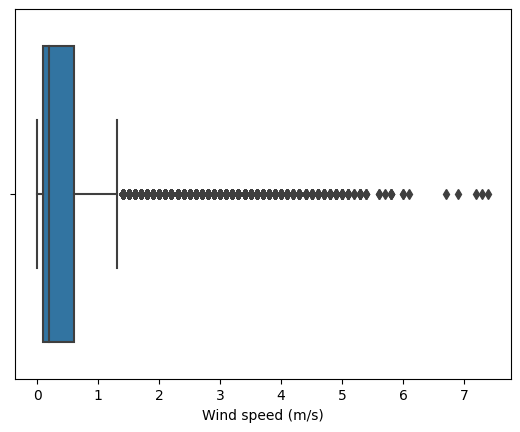

In [159]:
sns.boxplot(x=df['Wind speed (m/s)'])

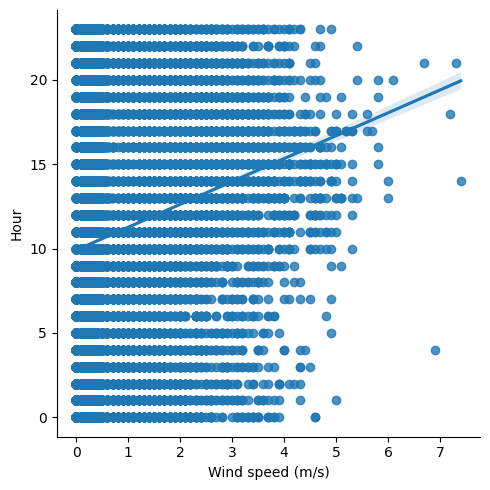

In [160]:
sns.lmplot(x='Wind speed (m/s)',y='Hour',data=df)

<Axes: xlabel='mnth', ylabel='count'>

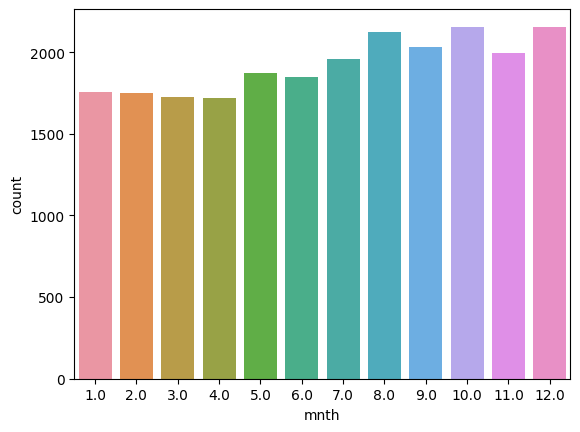

In [161]:
sns.countplot(x='mnth',data=df)

<Axes: xlabel='year_x', ylabel='count'>

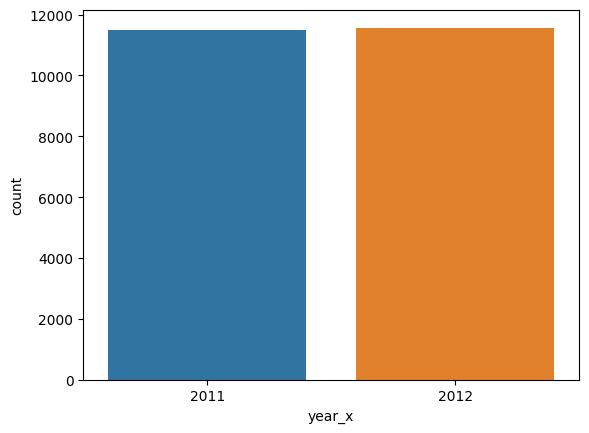

In [162]:
sns.countplot(x='year_x',data=df)

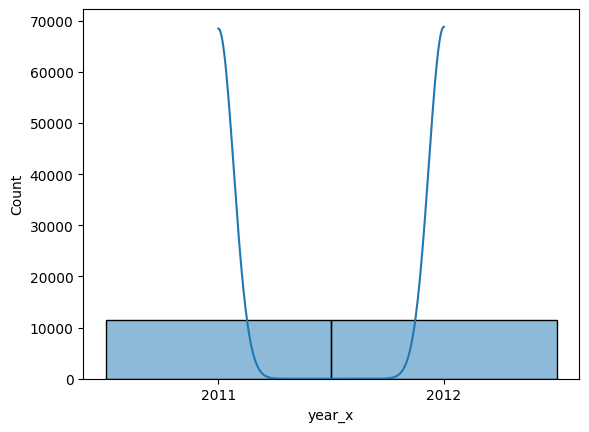

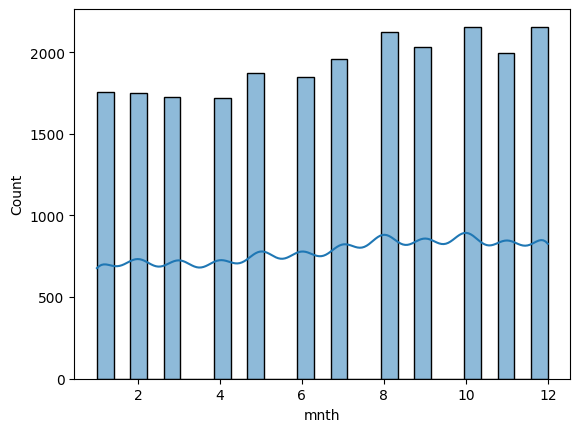

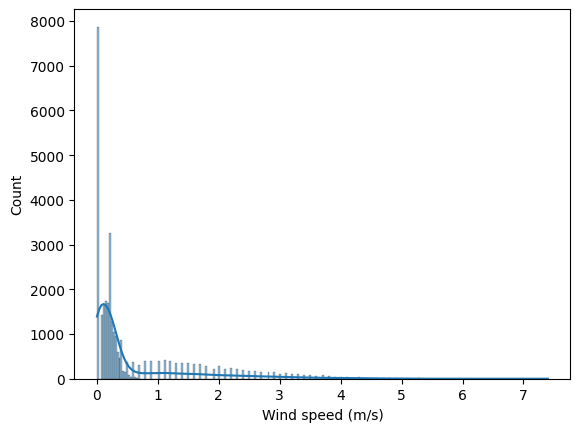

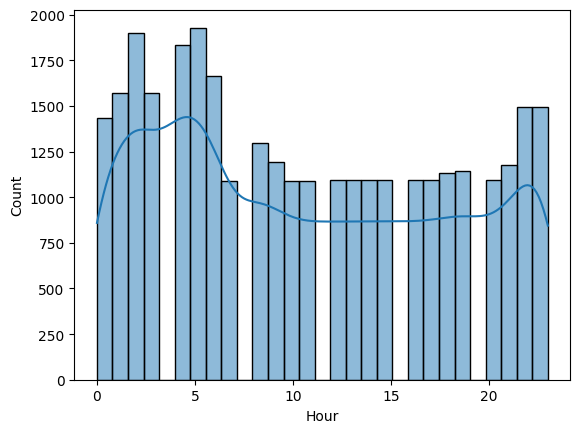

In [163]:
num_cols = ['year_x',	'mnth',	'Wind speed (m/s)',	'Hour']
for col in num_cols:
    sns.histplot(df[col], kde = True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


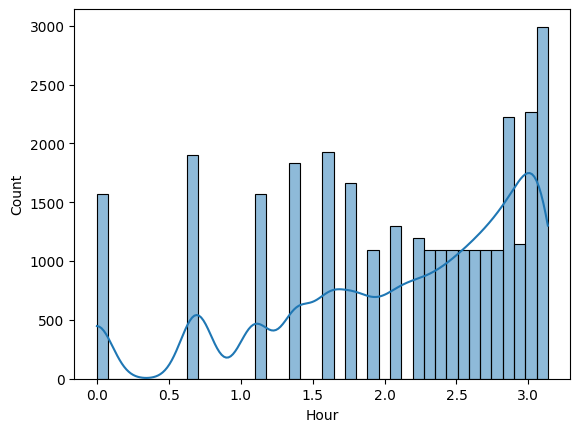

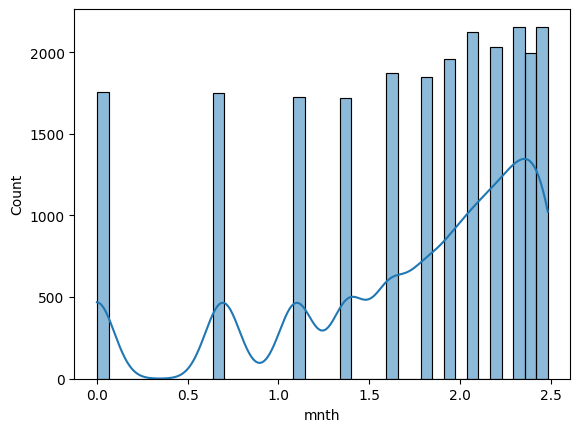

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


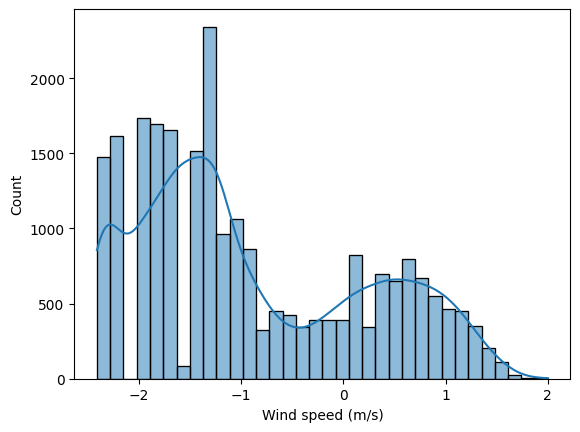

In [164]:
num_cols = ['Hour',	'mnth',	'Wind speed (m/s)']
for col in num_cols:
    sns.histplot(np.log(df[col]), kde = True)
    plt.show()

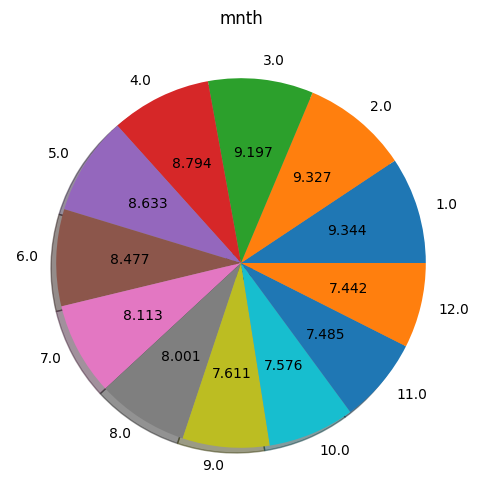

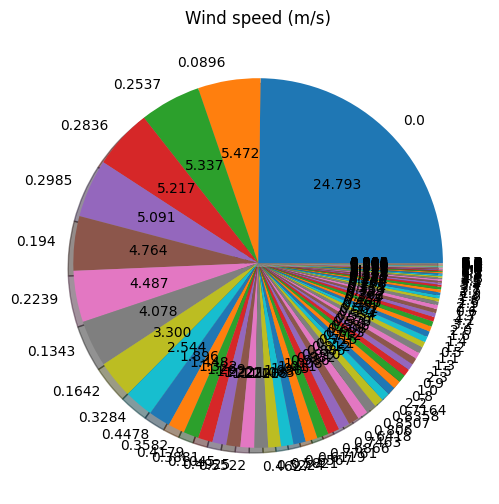

In [165]:
cols = ['mnth',	'Wind speed (m/s)']
for col in cols:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    unique_values = df[col].nunique()
    labels = df[col].unique()[:unique_values]
    plt.pie(df[col].value_counts().values[:unique_values], labels=labels, shadow=True, autopct='%.3f')
    plt.show()

In [166]:
cols = ['Hour',	'mnth',	'Wind speed (m/s)']
for col in cols:
    print(col + ':')
    print(df[col].value_counts())
    print()

Hour:
5     1928
2     1901
4     1831
6     1664
3     1573
1     1572
23    1496
22    1496
0     1432
8     1295
9     1193
21    1178
19    1144
18    1132
16    1094
17    1094
13    1093
14    1093
15    1093
20    1092
12    1092
10    1091
11    1091
7     1091
Name: Hour, dtype: int64

mnth:
12.0    2156
10.0    2152
8.0     2122
9.0     2029
11.0    1992
7.0     1956
5.0     1872
6.0     1846
1.0     1756
2.0     1748
3.0     1727
4.0     1717
Name: mnth, dtype: int64

Wind speed (m/s):
0.0000    7874
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
          ... 
7.2000       1
6.1000       1
7.3000       1
6.9000       1
5.7000       1
Name: Wind speed (m/s), Length: 94, dtype: int64



**Applying Muller**

In [167]:
df = df.dropna()
df.isnull().any()

instant                     False
season                      False
mnth                        False
Hour                        False
temp                        False
hum                         False
Wind speed (m/s)            False
cnt                         False
year_x                      False
Rented Bike Count           False
Temperature(C)              False
Visibility (10m)            False
Dew point temperature(C)    False
Solar Radiation (MJ/m2)     False
dtype: bool

In [168]:
X=df.iloc[:4000,:].drop(['mnth','Hour','hum', 'Wind speed (m/s)','cnt'],axis=1)
y=df.iloc[:4000,:]['mnth']

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7874 entries, 0 to 20893
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   7874 non-null   float64
 1   season                    7874 non-null   float64
 2   mnth                      7874 non-null   float64
 3   Hour                      7874 non-null   int64  
 4   temp                      7874 non-null   float64
 5   hum                       7874 non-null   float64
 6   Wind speed (m/s)          7874 non-null   float64
 7   cnt                       7874 non-null   float64
 8   year_x                    7874 non-null   object 
 9   Rented Bike Count         7874 non-null   float64
 10  Temperature(C)            7874 non-null   float64
 11  Visibility (10m)          7874 non-null   float64
 12  Dew point temperature(C)  7874 non-null   float64
 13  Solar Radiation (MJ/m2)   7874 non-null   float64
dtypes: floa

In [170]:
X['Temperature(C)'].fillna(X['Temperature(C)'].mean(), inplace=True)
X['Rented Bike Count'].fillna(X['Rented Bike Count'].median(), inplace=True)

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=2)

In [172]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]

In [173]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

In [174]:
from scipy.stats.mstats import winsorize
X_train = X_train.round(2)
X_test = X_test.round(2)
# apply winsorize() function to each column individually
X_train = X_train.apply(lambda x: winsorize(x, limits=[None, 0.01]))
X_test = X_test.apply(lambda x: winsorize(x, limits=[None, 0.01]))


In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Best Classifier using Muller Loop

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [177]:
names = [
    "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"
         ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

In [178]:
from sklearn import metrics
max_score = 0.0
max_class = ''
# iterate over classifiers
metrics_df = pd.DataFrame({
    'Classifier': [],
    'MSE' : [],
    'MAE': [],
    'RSquared': [],
    'Test Accuracy': [],
    'Recall':[],
    'Precision': []
    })
for name, clf in zip(names, classifiers):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    score = 100.0 * clf.score(X_test_scaled, y_test)
    mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
    mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
    r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
    test_acc = metrics.accuracy_score(y_test, y_pred) * 100
    recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
    precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
    new_row = pd.DataFrame({
    'Classifier': name,
    'MSE' : mean_absolute_error,
    'MAE': mean_squared_error,
    'RSquared': r_squared,
    'Test Accuracy': test_acc,
    'Recall': recall,
    'Precision': precision}, index=[0])
    metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

    print('Best Classifier -----> %s, Score (test, accuracy) -----> %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print('Best Classifier -----> %s, Score (test, accuracy) -----> %.2f' %(max_class, max_score))

Best Classifier -----> Nearest Neighbors, Score (test, accuracy) -----> 59.00,


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Classifier -----> Linear SVM, Score (test, accuracy) -----> 37.75,
Best Classifier -----> RBF SVM, Score (test, accuracy) -----> 64.00,
Best Classifier -----> Decision Tree, Score (test, accuracy) -----> 77.00,
Best Classifier -----> Random Forest, Score (test, accuracy) -----> 63.00,
Best Classifier -----> Neural Net, Score (test, accuracy) -----> 63.00,
Best Classifier -----> AdaBoost, Score (test, accuracy) -----> 21.25,
Best Classifier -----> Naive Bayes, Score (test, accuracy) -----> 51.25,
Best Classifier -----> Decision Tree, Score (test, accuracy) -----> 77.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
metrics_df.head(7)

,Classifier,MSE,MAE,RSquared,Test Accuracy,Recall,Precision
0,Naive Bayes,0.68,2.38,0.79,51.25,0.5125,0.368132
1,AdaBoost,1.58,5.11,0.54,21.25,0.2125,0.063422
2,Neural Net,0.39,0.43,0.96,63.00,0.6300,0.663311
3,Random Forest,0.48,0.85,0.92,63.00,0.6300,0.698046
4,Decision Tree,0.41,1.90,0.83,77.00,0.7700,0.855025
5,RBF SVM,0.38,0.42,0.96,64.00,0.6400,0.692198
6,Linear SVM,0.95,2.93,0.74,37.75,0.3775,0.208823


**Previously best performing algorithm KNN Classification**


In [180]:
X=df.iloc[:5000,:].drop(['mnth','Hour','hum', 'Wind speed (m/s)','cnt'],axis=1)
y=df.iloc[:5000,:]['mnth']

In [181]:
X['Temperature(C)'].fillna(X['Temperature(C)'].mean(), inplace=True)
X['Rented Bike Count'].fillna(X['Rented Bike Count'].median(), inplace=True)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=2)

X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

In [183]:
X_train = X_train.round(2)
X_test = X_test.round(2)

In [184]:
X_train = X_train.apply(lambda x: winsorize(x, limits=[None, 0.01]))
X_test = X_test.apply(lambda x: winsorize(x, limits=[None, 0.01]))

In [185]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [186]:
def get_metrics(y_test, y_pred):
  print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
  print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
  print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
  print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred) * 100)
  print('Recall:', metrics.recall_score(y_test, y_pred, average = 'weighted'))
  print('Precision:', metrics.precision_score(y_test, y_pred, average = 'weighted'))
  print('\n confussion matrix:\n',metrics.confusion_matrix(y_test, y_pred))
  clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  plt.show()

MSE :  0.6
MAE :  0.42
RSquared :  0.95
Test Accuracy: 61.0
Recall: 0.61
Precision: 0.6379428940219634

 confussion matrix:
 [[23  7  0  0  0  0  0  0  0  0  0  0]
 [28 18  0  0  0  0  0  0  0  0  0  0]
 [ 2  3 11  4  0  0  0  0  0  0  0  0]
 [ 0  0  2 16  4  0  0  0  0  0  0  0]
 [ 0  0  0 12 25  2  0  0  0  0  0  0]
 [ 0  0  0  2 10 17  4  0  0  0  0  0]
 [ 0  0  0  0  0 10 23  3  0  0  0  0]
 [ 0  0  0  0  0  1 18 29  1  0  0  0]
 [ 0  0  0  0  0  0  0 20 25  6  0  0]
 [ 0  0  0  0  0  0  0  0  9 55  4  2]
 [ 0  0  0  0  0  0  0  0  0  9 31  6]
 [ 0  0  1  0  0  0  0  0  0  2 23 32]]


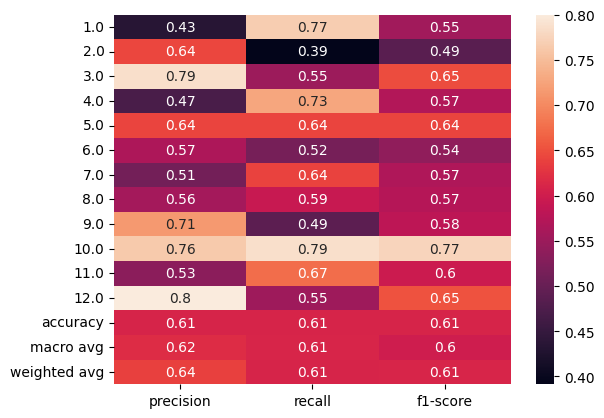

In [187]:
classifier = KNeighborsClassifier(2)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
get_metrics(y_test, y_pred)